# Kemper (2005): Upper arm compression

 Model validation information
- Performed by : Ali Riazi
- Reviewed by : Johan Iraeus and Bengt Pipkorn

Added to SAFER HBM Validation Catalog on : 2024-01-17

Recent update : 2024-01-17

## Title: 
- The simulation of the soft tissue compression is conducted on an isolated humerus in lateral-medial direction, following the experimental approach of Kemper et al. 2005

Ref: 
Kemper, A.; Stitzel, J.; Duma, S; Matsuoka, F; Masuda, M. BIOFIDELITY OF THE SID-IIs AND A MODIFIED SID-IIs UPPER EXTREMITY:
BIOMECHANICAL PROPERTIES OF THE HUMAN HUMERUS
Paper Number 05-0123

<!-- <div>
<img src="Capture.PNG" width="500"/>
</div> -->
![](kemper_upper_arm_s11.PNG)
## Experiment description
### Information on the specimens
- Four male humeri(average age:63, average body mass:91kg)

#### Impact and Positioning
- Isolated Humerus positioned in lateral-medial direction between two rigid plates. Initially the humerus was fixed in space and lower plate ascended to compress the flesh ensuring that the contact force between the lower plate and the humerus matched the humerus's weight, Subsequently, the humerus was released, and the impactor(upper plate) struck the midshaft with initial velocities of 2m/s and 4m/s.

### Loading and Boundary Conditions
- The potting cups are constrained in the anterior-posterior direction and rotation about the long axis of the bone

#### Uncertainities and Assumptions:
- The initial deformation of the humerus was assumed to correspond to the weight of the humerus rested on the lower plate.

### Responses recorded
- Contact force between the impactor and the flesh
- Displacement of the impactor


### SAFER HBM Version: `11.0`


# Setup and prerequisites 

In [15]:
import os
import glob
import numpy
import sys
import glob
# for data analysis
import pandas as pd
# packages for plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=2)


## Variable declaration

In [16]:
# Path to existing binouts

Sim_Tests = ['2ms_Velocity','4ms_Velocity']
Exp_Tests = ['2ms_Velocity','4ms_Velocity'] 

figures_dir = "results/figures/"
processed_data_dir = f"data/processed/"
experiment_dir= "../experiment_data/"
binout_path_sim={}
result_output_dir={}

if not os.path.exists(processed_data_dir): 
    os.makedirs(processed_data_dir)
if not os.path.exists(figures_dir): 
    os.makedirs(figures_dir)

for test in Sim_Tests:
    binout_path_sim[test] = test
    result_output_dir[test] = os.path.join(processed_data_dir, binout_path_sim[test])
    if not os.path.exists(result_output_dir[test]): 
        os.makedirs(result_output_dir[test])


# Postprocessing with dynasaur

In [17]:
# Import the dynasaur library
from dynasaur.plugins.data_visualization_controller import DataVisualizationController

In [18]:
# Path to Dynasaur definition files

# Dynasaur object definitions
dynasaur_ids = ["../_env/01_ID.def"]

# Dynasaur calculation definitions
dynasaur_calculation_defs = [ "../_env/Postprocess.def"]

## Extracting Time Series 

In [19]:
# Intialize a DataVisualizationController object, by passing the following argument 
#  -  binout files (data_source) 
#  -  list of dynasaur definition files (object_def_file, calculation_procedure_def_file)

sim_output={}
exp={}
exp_t = {}
for test in Sim_Tests:
    sim_M = DataVisualizationController(calculation_procedure_def_file=dynasaur_calculation_defs,
                                                  object_def_file=dynasaur_ids,
                                                  data_source= binout_path_sim[test] +'/binout*')
    commands = sim_M.get_defined_calculation_procedures()
    print(commands)
    for command in sim_M.get_defined_calculation_procedures():
        sim_M.calculate(command)
    # export post-processed data
    sim_M.write_CSV(result_output_dir[test], filename="Dynasaur_output.csv")
    # Import processed data
    sim_output[test]=pd.read_csv(os.path.join(result_output_dir[test],"Dynasaur_output.csv"), delimiter=';', header = [0,1,2,3])

[READ DYNASAUR DEF]	read ../_env/Postprocess.def
[READ DYNASAUR DEF]	done
[READ DYNASAUR DEF]	read ../_env/01_ID.def
[READ DYNASAUR DEF]	done
[READ BINOUT]	read rcforc data ...
[READ BINOUT]	done reading rcforc!
[READ BINOUT]	read nodout data ...
[READ BINOUT]	done reading nodout!
[{'visualization': 'Impactor_Force', 'x_label': 'time', 'y_label': 'force'}, {'visualization': 'Impactor_Force_non_filter', 'x_label': 'time', 'y_label': 'force'}, {'visualization': 'Impactor_Displacement', 'x_label': 'time', 'y_label': 'displacement'}]
[CALCULATION]	Calculating Visualization: Impactor_Force
[DATA]	read id 2m from channel name: z_force


c:\Users\seyedri\.conda\envs\SAFER\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: Impactor_Force_non_filter
[DATA]	read id 2m from channel name: z_force
[CALCULATION]	Calculating Visualization: Impactor_Displacement
[DATA]	read id 6841255 from channel name: z_displacement
[CALCULATION]	DATA VISUALIZATION writing csv to data/processed/2ms_Velocity
[CALCULATION]	DATA VISUALIZATION done writing csv to data/processed/2ms_Velocity\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/Postprocess.def
[READ DYNASAUR DEF]	done
[READ DYNASAUR DEF]	read ../_env/01_ID.def
[READ DYNASAUR DEF]	done
[READ BINOUT]	read rcforc data ...
[READ BINOUT]	done reading rcforc!
[READ BINOUT]	read nodout data ...
[READ BINOUT]	done reading nodout!
[{'visualization': 'Impactor_Force', 'x_label': 'time', 'y_label': 'force'}, {'visualization': 'Impactor_Force_non_filter', 'x_label': 'time', 'y_label': 'force'}, {'visualization': 'Impactor_Displacement', 'x_label': 'time', 'y_label': 'displacement'}]
[CALCULATION]	Calculating Visualization: Impactor_Force

c:\Users\seyedri\.conda\envs\SAFER\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: Impactor_Force_non_filter
[DATA]	read id 2m from channel name: z_force
[CALCULATION]	Calculating Visualization: Impactor_Displacement
[DATA]	read id 6841255 from channel name: z_displacement
[CALCULATION]	DATA VISUALIZATION writing csv to data/processed/4ms_Velocity
[CALCULATION]	DATA VISUALIZATION done writing csv to data/processed/4ms_Velocity\Dynasaur_output.csv


## Input the expriment data

In [20]:
exp = {}
exp_test = {}
temp = os.path.join(experiment_dir,Exp_Tests[0])
exp_test['2ms_Velocity'] = ['Kemper2005_2_1.csv','Kemper2005_2_2.csv','Kemper2005_2_3.csv','Kemper2005_2_4.csv']
exp_test['4ms_Velocity'] = ['Kemper2005_4_5.csv','Kemper2005_4_6.csv','Kemper2005_4_7.csv','Kemper2005_4_8.csv']
for test in exp_test[Exp_Tests[0]]:
    exp[test] = pd.read_csv(os.path.join(temp, test),delimiter=',')

temp = os.path.join(experiment_dir,Exp_Tests[1])
for test in exp_test[Exp_Tests[1]]:
    exp[test] = pd.read_csv(os.path.join(temp, test),delimiter=',')


## Plotting

The contact force vs the impactor's displacement are plotted up until the maximum value and compared with 4 different specimens.

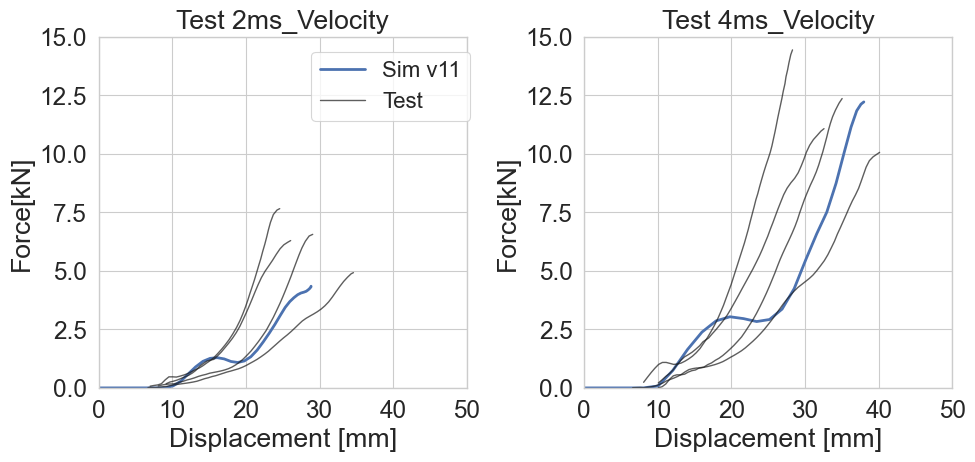

In [21]:
fig_ft, axs = plt.subplots(nrows=1, ncols=2,figsize=(10, 5))
i=0
for ax in axs.flat:
    ax.set_ylabel('Force[kN]')
    ax.set_xlabel('Displacement [mm]');
    if i > 1:
        break;
    ax.set_title('Test {}'.format(Exp_Tests[i]))
    ax.set_xlim([0,50])
    ax.set_ylim([0,15])
    df = pd.DataFrame(-sim_output[Sim_Tests[i]].Impactor.Force_non_filter.force)
    max_index = df.idxmax().values
    max_index = max_index + 1
    ax.plot(-sim_output[Sim_Tests[i]].Impactor.Displacement.displacement.iloc[:max_index[0]],-sim_output[Sim_Tests[i]].Impactor.Force_non_filter.force.iloc[:max_index[0]],linestyle ='-', color = 'b',alpha =1,linewidth=2)
    for test in exp_test[Exp_Tests[i]]:
        ax.plot(exp[test].values[:,0],exp[test].values[:,1],linestyle ='-', color =  'k',alpha = 0.7, linewidth=1,label='Test')
    i=i+1
fig_ft.legend(["Sim v11","Test"], bbox_to_anchor=(0.5,0.88),fontsize=16);
fig_ft.tight_layout()

In [22]:
fig_ft.savefig(os.path.join(figures_dir, 'Figure_v11.0_{}.jpg'.format(pd.to_datetime('today').strftime('%Y%m%d_%H%M%S'))), transparent=False, dpi=600, bbox_inches="tight")